# 행렬 인수분해
행렬 인수분해(Matrix Factorization)란 하나의 행렬을 여러 개의 행렬의 곱으로 나타내는 것을 말합니다. 마치 우리가 정수를 소인수분해하듯이, 행렬을 더 다루기 쉽거나 의미 있는 형태의 행렬들로 분해하는 것이죠.

In [1]:
import numpy as np

A = np.array([[4,1,5,4,1],
              [2,3,5,2,3],
              [1,3,4,1,3],
              [2,2,4,2,2],
              [1,3,4,1,3]])
A

array([[4, 1, 5, 4, 1],
       [2, 3, 5, 2, 3],
       [1, 3, 4, 1, 3],
       [2, 2, 4, 2, 2],
       [1, 3, 4, 1, 3]])

In [2]:
array1 = np.array([[4,1],
                   [2,3],
                   [1,3],
                   [2,2],
                   [1,3]])

array2 = np.array([[1,0,1,1,0],
                   [0,1,1,0,1]])

array1 @ array2

array([[4, 1, 5, 4, 1],
       [2, 3, 5, 2, 3],
       [1, 3, 4, 1, 3],
       [2, 2, 4, 2, 2],
       [1, 3, 4, 1, 3]])

In [3]:
A = np.array([[4,1,5,np.nan,1],
              [2,3,np.nan,2,3],
              [1,np.nan,4,1,3],
              [np.nan,2,4,np.nan,2],
              [1,np.nan,4,1,3]])
A

array([[ 4.,  1.,  5., nan,  1.],
       [ 2.,  3., nan,  2.,  3.],
       [ 1., nan,  4.,  1.,  3.],
       [nan,  2.,  4., nan,  2.],
       [ 1., nan,  4.,  1.,  3.]])

In [7]:
mask = ~ np.isnan(A)    # 누락값 없는 부분 = 값이 있는 부분이 True
mask

array([[ True,  True,  True, False,  True],
       [ True,  True, False,  True,  True],
       [ True, False,  True,  True,  True],
       [False,  True,  True, False,  True],
       [ True, False,  True,  True,  True]])

In [13]:
k = 2
m,n = A.shape
lr = 0.01

U = np.random.rand(m,k)   # 5행 2열
V = np.random.rand(n,k)   # 5행 2열

pred = U @ V.T         # 5행 5열
pred

array([[0.64473752, 0.75012231, 0.33861734, 0.86995399, 0.28893955],
       [0.50899669, 0.4523514 , 0.36576593, 0.65438884, 0.17571969],
       [0.20788368, 0.12866855, 0.18886226, 0.25426817, 0.05075858],
       [0.61854174, 0.6501014 , 0.37381311, 0.81849123, 0.25114776],
       [0.45466785, 0.66207   , 0.14510947, 0.64433207, 0.25361564]])

In [15]:
E = np.zeros((m,n))
E[mask] = pred[mask] - A[mask]
E

array([[-3.35526248, -0.24987769, -4.66138266,  0.        , -0.71106045],
       [-1.49100331, -2.5476486 ,  0.        , -1.34561116, -2.82428031],
       [-0.79211632,  0.        , -3.81113774, -0.74573183, -2.94924142],
       [ 0.        , -1.3498986 , -3.62618689,  0.        , -1.74885224],
       [-0.54533215,  0.        , -3.85489053, -0.35566793, -2.74638436]])

In [18]:
k = 2
m,n = A.shape
lr = 0.01

U = np.random.rand(m,k)   # 5행 2열
V = np.random.rand(n,k)   # 5행 2열

pred = U @ V.T 

E = np.zeros((m,n))
E[mask] = pred[mask] - A[mask]

box = []

for i in range(5000):
    A_pred = U @ V.T
    
    E = np.zeros((m,n))
    E[mask] = A_pred[mask] - A[mask]

    U_grad = E @ V   
    V_grad = E.T @ U

    U -= U_grad * lr
    V -= V_grad * lr

    loss = np.sum(E[mask] ** 2)
    print(loss)
    box.append(loss)      # 산을 타고 내려가는 게 보임

109.02744693680769
102.48198470462005
95.37917610534068
87.7901793372195
79.8334094796837
71.67357328122527
63.513408018904876
55.57734224836903
48.088443097127644
41.242493947215756
35.1848111974744
29.99539542627544
25.685852447305212
22.207974712655776
19.470518529983504
17.35899183216096
15.753639464961793
14.542642045778665
13.629703994640554
12.93680774030329
12.403641589189414
11.985225285687935
11.648896981762626
11.37137926856686
11.13627188945464
10.932074100960442
10.750706928782408
10.586450229445292
10.435198599367384
10.293950329323968
10.16046086289922
10.0330095697819
9.910243256935109
9.791071064551298
9.674593543680027
9.56005441392837
9.446807387012415
9.33429304507315
9.222022484095167
9.109565561567447
8.996542323882322
8.882616668093018
8.767491604298332
8.650905687955147
8.532630324117237
8.412467732725709
8.29024942160936
8.165835052093879
8.039111607722466
7.9099927938752765
7.778418607862976
7.644355027225181
7.5077937697374795
7.368752082875972
7.227272523804

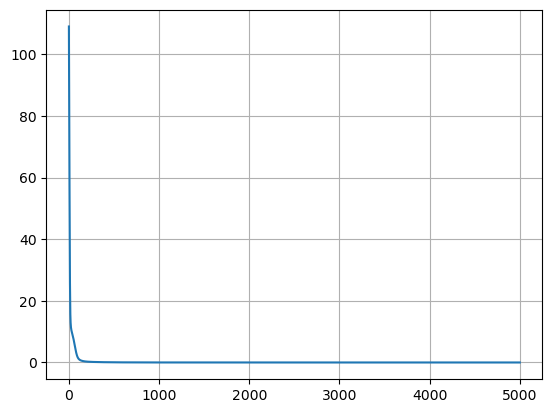

In [19]:
import matplotlib.pyplot as plt
plt.plot(box)
plt.grid()
plt.show()

In [21]:
A_pred, A

(array([[3.99998583, 0.99999912, 5.00000512, 3.99929951, 0.9999987 ],
        [2.00006653, 2.99999896, 5.00010168, 1.99993807, 2.99999982],
        [0.99996789, 2.99999847, 4.00000011, 1.00003251, 2.99999953],
        [1.99996834, 2.00000224, 3.99999633, 1.99975401, 2.00000267],
        [0.99996789, 2.99999847, 4.00000011, 1.00003251, 2.99999953]]),
 array([[ 4.,  1.,  5., nan,  1.],
        [ 2.,  3., nan,  2.,  3.],
        [ 1., nan,  4.,  1.,  3.],
        [nan,  2.,  4., nan,  2.],
        [ 1., nan,  4.,  1.,  3.]]))

In [22]:
A_filled = A.copy()
A_filled[~mask] = A_pred[~mask]

zeros = np.zeros(A_pred.shape)
zeros[~mask] += A_pred[~mask]

for i in range(len(zeros)):
    row = zeros[i]
    for j in range(len(row)):
        if row[j] >= 4:
            print(f"{i}번째 유저에게 {j}번째 영화 추천")

1번째 유저에게 2번째 영화 추천


# 행렬 인수분해 추천 시스템 구현하기

In [23]:
import pandas as pd

df = pd.read_csv("Data/ratings.csv")
df2 = df.pivot_table(index = 'userId', columns = 'movieId', values = 'rating').values
df2

array([[4. , nan, 4. , ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [2.5, 2. , 2. , ..., nan, nan, nan],
       [3. , nan, nan, ..., nan, nan, nan],
       [5. , nan, nan, ..., nan, nan, nan]])

# 연습문제

## 문제 1
k 값을 현재 설정된 값(예: 2)에서 k=5, k=20, k=50으로 변경해가며 모델을 학습시켜 보세요. (학습률 lr은 0.0005, 반복 횟수는 1000~2000회 정도로 조정하여 실행 시간을 관리하세요.) 각 k 값에 따른 최종 손실(loss) 값을 비교하고, k 값이 너무 작거나 너무 클 때 발생할 수 있는 문제점에 대해 생각해보세요. (예: 과소적합, 과적합) k 값의 변화가 특정 사용자(예: userId 1)에 대한 예측 평점(df_pred[0])에 어떤 영향을 미치는지 관찰해보세요.

### 1) k=2일때

In [35]:
mask = ~ np.isnan(df2) 

k = 2
m,n = df2.shape
lr = 0.0005

U = np.random.rand(m,k) 
V = np.random.rand(n,k) 

box = []

for i in range(1500):
    df2_pred = U @ V.T
    
    E = np.zeros((m,n))
    E[mask] = df2_pred[mask] - df2[mask]

    U_grad = E @ V   
    V_grad = E.T @ U

    U -= U_grad * lr
    V -= V_grad * lr

    loss = np.sum(E[mask] ** 2)
    print(loss)
    box.append(loss)

1038218.0628245276
800134.5052596882
633494.6990300321
505515.24408967467
414542.8186416229
351940.20965452236
307405.2800475185
274114.162953928
248252.6273590547
227601.89006726805
210762.999339061
196798.0587169934
185050.31140312031
175044.88576930857
166429.98947219376
158940.00266510886
152371.20026580867
146565.19201664397
141397.3187141115
136768.35609554875
132598.48943409204
128822.87945510031
125388.36112400917
122250.95937847585
119374.0006863961
116726.66373199066
114282.85697018905
112020.34180494936
109920.04201588705
107965.49562650509
106142.416597327
104438.34184649787
102842.34504672908
101344.80304170377
99937.20400016148
98611.98888643787
97362.41968858683
96182.46926450449
95066.72875503711
94010.32935295696
93008.87586839903
92058.39003977006
91155.26193784252
90296.20812499606
89478.23548049004
88698.60980079368
87954.82844248772
87244.59640263379
86565.80533437298
85916.51507897825
85294.93736361816
84699.42136980144
84128.44092329845
83580.58309419827
83054.53

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df2[mask], df2_pred[mask])
rmse = mean_squared_error(df2[mask], df2_pred[mask]) ** (1/2)

### 2) k=5일때

In [40]:
mask = ~ np.isnan(df2) 

k = 5
m,n = df2.shape
lr = 0.0005

U = np.random.rand(m,k) 
V = np.random.rand(n,k) 

box = []

for i in range(1500):
    df2_pred = U @ V.T
    
    E = np.zeros((m,n))
    E[mask] = df2_pred[mask] - df2[mask]

    U_grad = E @ V   
    V_grad = E.T @ U

    U -= U_grad * lr
    V -= V_grad * lr

    loss = np.sum(E[mask] ** 2)
    print(loss)
    box.append(loss)

653227.299916025
414175.27427220944
304072.8631010282
243715.9086497262
208674.47997206452
186876.4296209294
173025.54623869446
164682.30542092386
161658.2420560948
163900.65508973578
174014.9389077704
192550.7246374379
225815.28965273214
268208.4683481043
326241.4574688393
361970.6825144522
381037.70277168736
326526.1405142989
265808.63521638355
192327.3039474927
151792.4987334731
125408.03646115468
112223.57658272285
104098.24628053243
99231.34154379305
95812.323746112
93324.99527070676
91340.4254310603
89706.92785061784
88299.83906606639
87065.79637310472
85959.61150738268
84958.24009960015
84041.48652953705
83197.34003276465
82414.99724820106
81687.194027779
81007.29074198543
80370.40494046155
79772.03284823292
79208.65229160947
78676.9957830283
78174.40041652143
77698.38483962243
77246.87090929697
76817.9134698355
76409.85443781585
76021.13362786562
75650.4069335328
75296.40114677192
74958.01408676163
74634.19253802561
74324.02541468818
74026.63177490857
73741.25487275075
73467.15

In [41]:
box[-1]

41415.81219285565

### 3) k=20일때

In [42]:
mask = ~ np.isnan(df2) 

k = 20
m,n = df2.shape
lr = 0.0005

U = np.random.rand(m,k) 
V = np.random.rand(n,k) 

box = []

for i in range(1500):
    df2_pred = U @ V.T
    
    E = np.zeros((m,n))
    E[mask] = df2_pred[mask] - df2[mask]

    U_grad = E @ V   
    V_grad = E.T @ U

    U -= U_grad * lr
    V -= V_grad * lr

    loss = np.sum(E[mask] ** 2)
    print(loss)
    box.append(loss)

474714.169163818
1504352.8554907227
24651106.418480337
92541921.0467753
374306329.87480897
891595644395.4346
3.177483371332081e+22
1.8755168229964885e+54
4.027990471727809e+149
inf


C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\4240440468.py:23: RuntimeWarning: overflow encountered in matmul
  U_grad = E @ V
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\4240440468.py:24: RuntimeWarning: overflow encountered in matmul
  V_grad = E.T @ U
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\4240440468.py:29: RuntimeWarning: overflow encountered in square
  loss = np.sum(E[mask] ** 2)
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\4240440468.py:23: RuntimeWarning: invalid value encountered in matmul
  U_grad = E @ V
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\4240440468.py:24: RuntimeWarning: invalid value encountered in matmul
  V_grad = E.T @ U


inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyboardInterrupt: 

### 4) k=50일때

In [43]:
mask = ~ np.isnan(df2) 

k = 50
m,n = df2.shape
lr = 0.0005

U = np.random.rand(m,k) 
V = np.random.rand(n,k) 

box = []

for i in range(1500):
    df2_pred = U @ V.T
    
    E = np.zeros((m,n))
    E[mask] = df2_pred[mask] - df2[mask]

    U_grad = E @ V   
    V_grad = E.T @ U

    U -= U_grad * lr
    V -= V_grad * lr

    loss = np.sum(E[mask] ** 2)
    print(loss)
    box.append(loss)

8326379.751929624
156636008.76572865
17078804646.98541
1.9842909772946096e+17
4.3287789171710496e+38
4.7525086430187e+102
6.452919780581294e+294
inf


C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\3015621946.py:18: RuntimeWarning: overflow encountered in matmul
  df2_pred = U @ V.T
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\3015621946.py:23: RuntimeWarning: invalid value encountered in matmul
  U_grad = E @ V
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\3015621946.py:24: RuntimeWarning: invalid value encountered in matmul
  V_grad = E.T @ U


inf
nan
nan
nan
nan
nan
nan


KeyboardInterrupt: 

#### 해석
k=2일때 54745.86102323613, k=5일때 41415.81219285565, k=20일때 inf, k=50일때 inf   
=> k가 너무 작을 때 (예: k=2): 모델이 사용자와 아이템의 다양한 특성을 충분히 표현하지 못해 과소적합 발생   
k가 적절할 때 (예: k=5): 모델이 사용자 및 아이템의 잠재적인 선호 및 특성을 적절히 반영하여, 손실 값이 감소하고 예측 성능이 향상됨   
k가 너무 클 때 (예: k=20, 50): 모델의 복잡도가 과도하게 증가하여 학습이 불안정해지고 발산하는 문제가 발생. 즉 과적합 가능성과 더불어, 파라미터 수의 급격한 증가로 인해 계산상 오버플로우나 수치 불안정성이 초래될 수 있음   


k=2에서는 해당 사용자에 대한 예측이 평균적이고 단조로운 값을 보이는 반면, k=5에서는 사용자 고유의 선호를 더 잘 반영한 다양하고 정확한 예측이 가능해진다.  
k=20과 k=50에서는 모델이 수렴하지 않아 해당 사용자의 예측 평점 자체가 불안정하거나 무의미할 수도 있다.

## 문제 2
잠재 요인 수 k를 적절한 값(예: 10)으로 고정한 후, 학습률 lr을 0.01, 0.001, 0.00001 등으로 변경하며 모델을 학습시켜 보세요. 학습률 변화에 따른 반복 횟수별 손실(loss) 값의 변화를 관찰하세요. (Matplotlib 등을 사용하여 그래프로 시각화해보면 좋습니다.) 학습률이 너무 클 때와 너무 작을 때 어떤 현상이 발생하는지, 그 이유는 무엇일지 설명해보세요. (예: 발산, 학습 속도 저하)

### 1) 학습률 0.01

In [45]:
mask = ~ np.isnan(df2) 

k = 10
m,n = df2.shape
lr = 0.01

U = np.random.rand(m,k) 
V = np.random.rand(n,k) 

pred = U @ V.T 

E = np.zeros((m,n))
E[mask] = pred[mask] - df2[mask]

box = []

for i in range(1500):
    df2_pred = U @ V.T
    
    E = np.zeros((m,n))
    E[mask] = df2_pred[mask] - df2[mask]

    U_grad = E @ V   
    V_grad = E.T @ U

    U -= U_grad * lr
    V -= V_grad * lr

    loss = np.sum(E[mask] ** 2)
    print(loss)
    box.append(loss)

263912.7895805412
75924648.75392027
2486622766816558.5
1.2464843855466926e+38
1.7457294345536414e+106
inf


C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\844716006.py:29: RuntimeWarning: overflow encountered in square
  loss = np.sum(E[mask] ** 2)
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\844716006.py:18: RuntimeWarning: overflow encountered in matmul
  df2_pred = U @ V.T


inf
inf


C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\844716006.py:23: RuntimeWarning: invalid value encountered in matmul
  U_grad = E @ V
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\844716006.py:24: RuntimeWarning: invalid value encountered in matmul
  V_grad = E.T @ U


nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyboardInterrupt: 

### 2) 학습률 0.001

In [46]:
mask = ~ np.isnan(df2) 

k = 10
m,n = df2.shape
lr = 0.001

U = np.random.rand(m,k) 
V = np.random.rand(n,k) 

pred = U @ V.T 

E = np.zeros((m,n))
E[mask] = pred[mask] - df2[mask]

box = []

for i in range(1500):
    df2_pred = U @ V.T
    
    E = np.zeros((m,n))
    E[mask] = df2_pred[mask] - df2[mask]

    U_grad = E @ V   
    V_grad = E.T @ U

    U -= U_grad * lr
    V -= V_grad * lr

    loss = np.sum(E[mask] ** 2)
    print(loss)
    box.append(loss)

254884.78105330613
346544.42792438855
5788186.962487161
16122087.186177293
2384229663.9894753
8892143534933592.0
6.813481413756454e+35
3.1295802672974356e+95
3.053183458419968e+274
inf


C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\364502380.py:18: RuntimeWarning: overflow encountered in matmul
  df2_pred = U @ V.T
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\364502380.py:23: RuntimeWarning: invalid value encountered in matmul
  U_grad = E @ V
C:\Users\campus4D019\AppData\Local\Temp\ipykernel_30256\364502380.py:24: RuntimeWarning: invalid value encountered in matmul
  V_grad = E.T @ U


inf
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


KeyboardInterrupt: 

### 3. 학습률 0.00001

In [47]:
mask = ~ np.isnan(df2) 

k = 10
m,n = df2.shape
lr = 0.00001

U = np.random.rand(m,k) 
V = np.random.rand(n,k) 

pred = U @ V.T 

E = np.zeros((m,n))
E[mask] = pred[mask] - df2[mask]

box = []

for i in range(1500):
    df2_pred = U @ V.T
    
    E = np.zeros((m,n))
    E[mask] = df2_pred[mask] - df2[mask]

    U_grad = E @ V   
    V_grad = E.T @ U

    U -= U_grad * lr
    V -= V_grad * lr

    loss = np.sum(E[mask] ** 2)
    print(loss)
    box.append(loss)

267683.05314100895
263706.9100471224
259973.45537893087
256458.64580009063
253141.22540940112
250002.38478337857
247025.46266988516
244195.68493022874
241499.9360195605
238926.55889745295
236465.17978443313
234106.55463640112
231842.43460627765
229665.44810860517
227568.99740486385
225547.1678907153
223594.6484962501
221706.66181092794
219878.90272001142
218107.48449218468
216388.89139155025
214719.93700379043
213097.72756811418
211519.62969556946
209983.24193201007
208486.36969190897
207027.00314853172
205603.29771783005
204213.55681871873
202856.21663199688
201529.8326147832
200233.06755759096
198964.68099761492
197723.51982492948
196508.50993851462
195318.64882671344
194152.9989621876
193010.68191496664
191890.87309902575
190792.79707817928
189715.7233661439
188658.96266355936
187621.86348169856
186603.809108684
185604.2148793543
184622.5257145917
183658.21390001386
182710.77707751756
181779.73642630668
180864.63501279574
179965.03629119974
179080.52273874474
178210.69461130118
1773

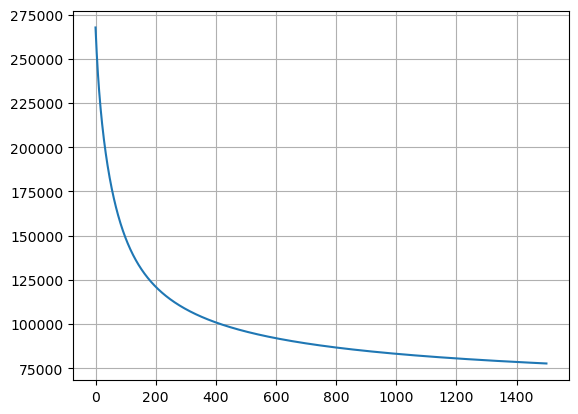

In [48]:
import matplotlib.pyplot as plt
plt.plot(box)
plt.grid()
plt.show()

#### 해석
학습률 0.01일때 inf, 학습률 0.001일때 inf, 학습률 0.00001일때 77626.6648056285    
=> 학습률이 너무 크면 발산, 너무 작으면 학습 속도 저하로 이어지므로 적절한 학습률 설정이 필수적이다

## 문제 3
임의의 userId (예: 사용자 ID 5)를 선택하세요. 해당 사용자가 아직 평가하지 않은 영화들에 대한 예측 평점을 추출하세요. 추출된 예측 평점을 기준으로, 해당 사용자에게 가장 높은 평점이 예측된 상위 3개의 영화 제목을 추천하는 코드를 작성해보세요.

In [ ]:
idx = np.argsort(pred[4])[::-1][:5]
idx

In [55]:
import numpy as np
import pandas as pd

ratings = pd.read_csv("Data/ratings.csv")
movies = pd.read_csv("Data/movies.csv")

df2 = ratings.pivot(index='userId', columns='movieId', values='rating')
A = df2.to_numpy()
mask = ~np.isnan(A)

k = 5
m, n = A.shape
lr = 0.0005
n_iter = 1000 
np.random.seed(0)

U = np.random.rand(m, k)
V = np.random.rand(n, k)

observed_rows, observed_cols = np.where(mask)
observed_indices = list(zip(observed_rows, observed_cols))

for epoch in range(n_iter):
    A_pred = U @ V.T

    error = A_pred[observed_rows, observed_cols] - A[observed_rows, observed_cols]

    U_grad = np.zeros_like(U)
    V_grad = np.zeros_like(V)

    for i, j, e in zip(observed_rows, observed_cols, error):
        U_grad[i] += e * V[j]
        V_grad[j] += e * U[i]

    U -= lr * U_grad
    V -= lr * V_grad

    if epoch < 10 or epoch % 100 == 0:
        loss = np.sum(error ** 2)
        print(f"epoch {epoch}, loss: {loss:.4f}")

A_pred = U @ V.T

user_idx = 4
user_row = A[user_idx]
pred_row = A_pred[user_idx]

unrated = np.isnan(user_row)
top_indices = np.argsort(pred_row[unrated])[::-1][:3]

unrated_movie_ids = df2.columns[unrated]
top_movie_ids = unrated_movie_ids[top_indices]

print("\nuserId 5에게 추천할 영화:")
for movie_id in top_movie_ids:
    title = movies.loc[movies["movieId"] == movie_id, "title"].values[0]
    pred_score = pred_row[df2.columns.get_loc(movie_id)]
    print(f"{title} (예측 평점: {pred_score:.2f})")

epoch 0, loss: 656054.4473
epoch 1, loss: 412075.1005
epoch 2, loss: 302338.2571
epoch 3, loss: 242838.1042
epoch 4, loss: 208292.5134
epoch 5, loss: 186648.1809
epoch 6, loss: 172739.4817
epoch 7, loss: 164226.1888
epoch 8, loss: 160923.6526
epoch 9, loss: 162831.3016
epoch 100, loss: 67822.9460
epoch 200, loss: 61425.7026
epoch 300, loss: 57420.4567
epoch 400, loss: 53985.7732
epoch 500, loss: 51167.1034
epoch 600, loss: 48955.6695
epoch 700, loss: 47265.4648
epoch 800, loss: 45965.0939
epoch 900, loss: 44944.5315

userId 5에게 추천할 영화:
Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990) (예측 평점: 6.05)
Strictly Sexual (2008) (예측 평점: 6.01)
Villain (1971) (예측 평점: 5.95)


In [59]:
A_pred = U @ V.T

A_pred_clipped = np.clip(A_pred, 0, 5)

user_idx = 4
user_row = A[user_idx]
pred_row = A_pred_clipped[user_idx]

unrated = np.isnan(user_row)
top_indices = np.argsort(pred_row[unrated])[::-1][:3]

unrated_movie_ids = df2.columns[unrated]
top_movie_ids = unrated_movie_ids[top_indices]

print("\nuserId 5에게 추천할 영화:")
for movie_id in top_movie_ids:
    title = movies.loc[movies["movieId"] == movie_id, "title"].values[0]
    pred_score = pred_row[df2.columns.get_loc(movie_id)]
    print(f"{title} (예측 평점: {pred_score:.2f})")


userId 5에게 추천할 영화:
Life-Size (2000) (예측 평점: 5.00)
Unfaithfully Yours (1948) (예측 평점: 5.00)
Rain (2001) (예측 평점: 5.00)
